# Automobile Dataset
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/Automobile_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/automobile.csv)

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns

In [155]:
names=['symboling','norm_losses','brand','fuel','aspiration','doors','body_style','drive_wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
data = pd.read_csv('../../Lab1/Romil/Data/processed_data_Automobile.csv',header=None,names = names,)
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
norm_losses          205 non-null int64
brand                205 non-null object
fuel                 205 non-null object
aspiration           205 non-null object
doors                203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [156]:
data_new = data.drop(['symboling','doors','norm_losses','height','compression-ratio','price'],axis= 1)

** Converting all the categorical data into numeric through one hot encoding.**

In [157]:
data_dummy = pd.get_dummies(data)

In [158]:
data_dummy.dtypes

symboling                    int64
norm_losses                  int64
wheel-base                 float64
length                     float64
width                      float64
height                     float64
curb-weight                  int64
engine-size                  int64
bore                       float64
stroke                     float64
compression-ratio          float64
horsepower                   int64
peak-rpm                   float64
city-mpg                     int64
highway-mpg                  int64
price                        int64
brand_alfa-romero            uint8
brand_audi                   uint8
brand_bmw                    uint8
brand_chevrolet              uint8
brand_dodge                  uint8
brand_honda                  uint8
brand_isuzu                  uint8
brand_jaguar                 uint8
brand_mazda                  uint8
brand_mercedes-benz          uint8
brand_mercury                uint8
brand_mitsubishi             uint8
brand_nissan        

In [187]:
X_train, X_test, y_train, y_test = train_test_split(data_dummy, y, test_size=0.33, random_state=42)

In [188]:
X_train.shape

(137, 76)

In [189]:
y_train

array([22018, 10345,  6938, 18150,  7603,  6095, 16695,  9538, 12945,
       12764,  6669,  7957,  7609, 18620, 16845, 18150, 16500,  6189,
       11048,  7609, 34028,  6989,  5118,  7295, 17075, 10595,  6377,
       15510, 13845,  6529, 16925, 18950,  8058, 17710,  8558, 32528,
       15985,  7126, 17450,  5399, 12440,  9495, 16630,  8013, 16430,
       10245,  5572,  5348, 11199, 13495,  7995,  7975, 31600, 22470,
       11245, 13207,  9298,  8921, 10295, 13200,  8921,  7957,  8778,
       11595,  8499,  8845, 17669, 32250,  7299,  7898,  6785,  7775,
       13950, 19699,  6695, 12170,  8195,  8358,  9980, 36000,  9959,
        7129, 18920, 13860,  6649, 14869, 15750,  8495,  5499, 23875,
       21105,  8845, 10898,  9895, 36880, 35056, 15690, 15040, 11549,
       18420, 10795,  7395, 11900,  5195, 19045,  9989, 15645, 35550,
        9279,  5572, 13645,  7738, 16515, 13207,  7895,  7198, 12290,
       16500,  6795, 11694,  9295,  6338, 13499,  8949, 17950,  9279,
       45400,  6692,

### Linear regression on all features

In [190]:
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [191]:
reg.score(X_test,y_test)

1.0

In [192]:
y_pred = reg.predict(X_test)

In [193]:
metrics.mean_absolute_error(y_test,y_pred)

3.036107313271393e-12

In [195]:
metrics.mean_squared_error(y_test,y_pred)

1.8940003143309767e-23

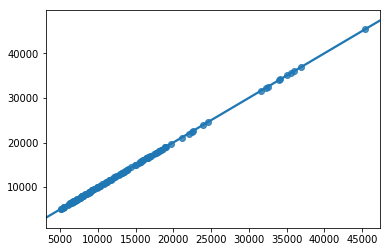

In [169]:
sns.regplot(y,y_pred)

### Linear regression on selected features

In [170]:
df_dummy = pd.get_dummies(data_new)

In [171]:
df_dummy.head()


,wheel-base,length,width,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,130,3.47,2.68,111,5000.0,21,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,2.68,111,5000.0,21,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,3.47,154,5000.0,19,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,3.40,102,5500.0,24,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,3.40,115,5500.0,18,...,0,0,0,0,0,0,0,1,0,0


In [172]:
df_dummy.columns

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'brand_alfa-romero', 'brand_audi', 'brand_bmw', 'brand_chevrolet',
       'brand_dodge', 'brand_honda', 'brand_isuzu', 'brand_jaguar',
       'brand_mazda', 'brand_mercedes-benz', 'brand_mercury',
       'brand_mitsubishi', 'brand_nissan', 'brand_peugot', 'brand_plymouth',
       'brand_porsche', 'brand_renault', 'brand_saab', 'brand_subaru',
       'brand_toyota', 'brand_volkswagen', 'brand_volvo', 'fuel_diesel',
       'fuel_gas', 'aspiration_std', 'aspiration_turbo',
       'body_style_convertible', 'body_style_hardtop', 'body_style_hatchback',
       'body_style_sedan', 'body_style_wagon', 'drive_wheels_4wd',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine-location_front',
       'engine-location_rear', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-ty

In [174]:
X_train, X_test, y_train, y_test = train_test_split(df_dummy, y, test_size=0.33, random_state=42)

In [179]:
reg = LinearRegression().fit(X_train,y_train)

In [ ]:
reg.

In [180]:
reg.score(X_test,y_test)

0.8349032446855393

In [181]:
y_pred = reg.predict(X_test)

In [182]:
metrics.mean_squared_error(y_test,y_pred)

10705377.084964203

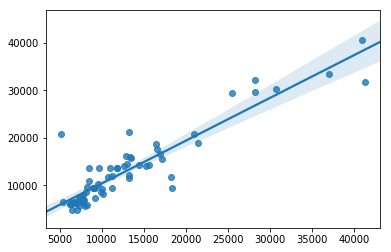

In [184]:
sns.regplot(y_test,y_pred)

In [199]:
y_test[0:10]

array([30760, 13207,  9549, 11850, 28248,  7799,  7788,  9258, 10198,
        7775])

In [200]:
y_pred[0:10]

array([30760., 13207.,  9549., 11850., 28248.,  7799.,  7788.,  9258.,
       10198.,  7775.])